In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('auto-mpg.csv')
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


 Khảo sát tập dữ liệu auto_mpg.csv. Loại bỏ điểm dữ liệu bị thiếu, lựa chọn đặc trưng tốt nhất.


In [ ]:
# Remove missing data
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
data = data[data.horsepower != '?']
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# Extract feature
X = data.loc[:, ['cylinders', 'displacement', 'weight', 'acceleration']]
y = data.loc[:, ['mpg']].values
print(X.shape, y.shape)

(392, 4) (392, 1)


In [ ]:
# # Split data into traning set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(313, 4) (313, 1)
(79, 4) (79, 1)


In [ ]:
# Scale input in to [0, 1]
# X_scaled = (X-X_min) / (X_max - X_min)
# Remove keepdims=True as it is not supported by pandas DataFrame min/max
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)
X_train_scaled = (X_train - X_min) / (X_max - X_min)
X_test_scaled = (X_test - X_min) / (X_max - X_min)

XÂY DỰNG MÔ HÌNH


In [ ]:
def predict (X,w):
  y_pred = np.dot(X,w)
  return y_pred
def loss (y_true, y_pred):
 return np.mean((y_true - y_pred)**2)

w = np.zeros((4,1))
y_pred = predict(X_train_scaled, w)
loss(y_train, y_pred)

np.float64(620.0295846645367)

In [ ]:
# Define Gradient function
def grad(X, y, w):
 y_pred = predict(X, w)
 delta = y_pred - y
 dw = np.dot(X.T, delta)
 return dw

In [ ]:
# Perform gradient descent
w = np.zeros((4, 1))
lr = 0.005
n_epoch = 20

his = []
for i in range(n_epoch):
 dw = grad(X_train_scaled, y_train, w)
 y_pred = predict(X_train_scaled, w)
 his.append(loss(y_train, y_pred))
 w -= lr * dw


Text(0, 0.5, 'Loss')

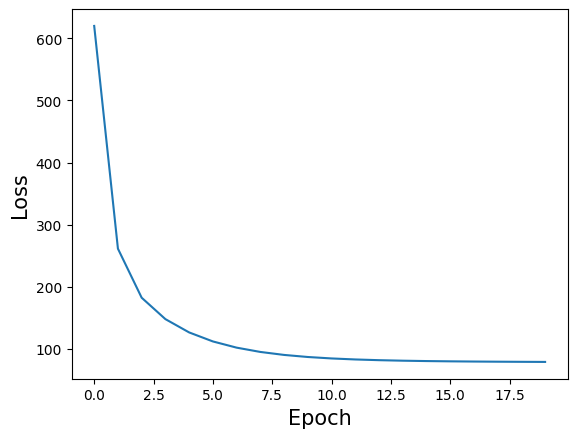

In [ ]:
plt.plot(his)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)


In [ ]:
# Đánh giá mô hình
def evaluate(y_true, y_pred):
 rmse = np.sqrt(np.mean((y_true - y_pred)**2))
 mae = np.mean(np.abs(y_true - y_pred))

 sst = np.sum((y_true - y_true.mean())**2)
 ssr = np.sum((y_pred - y_true)**2)
 r2 = 1.0 - ssr/sst

 print(f"RMSE = {rmse}")
 print(f"MAE = {mae}")
 print(f"r2-score = {r2}")
 return rmse, mae, r2

y_pred = predict(X_test, w)
evaluate(y_test, y_pred)


RMSE = 2244.003419475028
MAE = 2226.1089406264114
r2-score = -98656.79399406596


(np.float64(2244.003419475028),
 np.float64(2226.1089406264114),
 np.float64(-98656.79399406596))

Cải tiến mô hình bằng cách đưa thêm số hạng intercept (bias)

$\hat{y} =w_\circ + w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4$

In [ ]:
m = X_train.shape[0]
one = np.ones((m, 1))
X_new = np.hstack((one, X_train_scaled))
X_new
w = np.zeros((5, 1))
lr = 0.001
n_epoch = 2000
his = []
for i in range(n_epoch):
 dw = grad(X_new, y_train, w)
 y_pred = predict(X_new, w)
 his.append(loss(y_train, y_pred))

 w -= lr * dw


[np.float64(18.27736613981537),
 np.float64(18.277361483544546),
 np.float64(18.27735683678119),
 np.float64(18.277352199502012),
 np.float64(18.277347571683794)]

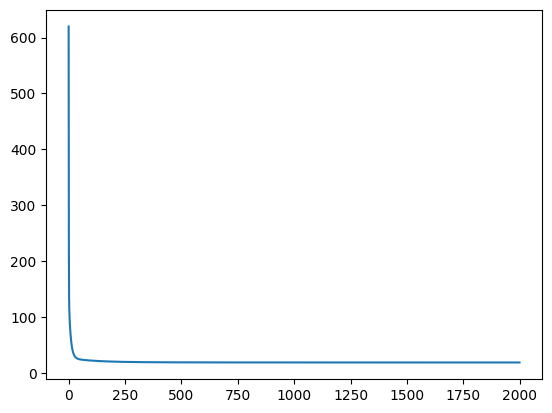

In [ ]:
plt.plot(his)
his[-5:]


Đánh giá hiệu suất

$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^m(\hat{y}_i - y_i)^2}$

$MAE = \frac{1}{m}\sum_{i=1}^m |\hat{y}_i - y_i|$

$r^2 = 1 - \frac{SSR}{SST}$

$SSR = \sum_{i=1}^m (\hat{y}_i - y_i)^2$

$SST = \sum_{i=1}^m (y_i - \bar{y})^2$

In [ ]:
X_test_new = np.hstack((np.ones((X_test.shape[0], 1)), X_test_scaled))
y_pred = predict(X_test_new, w)
evaluate(y_test, y_pred)


RMSE = 4.255877783339747
MAE = 3.5038075201759527
r2-score = 0.645135408786277


(np.float64(4.255877783339747),
 np.float64(3.5038075201759527),
 np.float64(0.645135408786277))

In [ ]:
# Mini-batch training
def batch_generator(X, y, batch_size = 64):
 idx = np.arange(X.shape[0])
 np.random.shuffle(idx)

 n_batchs = X.shape[0] // batch_size + 1
 # Ensure the code block under the for loop is properly indented
 for i in range(n_batchs):
  i_start = i * batch_size
  i_stop = np.min([(i+1) * batch_size, X.shape[0]])
  X_batch = X[i_start: i_stop]
  y_batch = y[i_start: i_stop]
  yield X_batch, y_batch

# Initialize w, lr, n_epoch and his once
w = np.zeros((5, 1))
lr = 0.01
n_epoch = 200
his = []

# Outer loop for epochs
for _ in range(n_epoch):
 # Calculate loss for the current epoch
 y_pred = predict(X_new, w)
 his.append(loss(y_train, y_pred))
 # Inner loop for mini-batches
 for X_batch, y_batch in batch_generator(X_new, y_train, batch_size=35):
  dw = grad(X_batch, y_batch, w)
  w -= lr * dw

print(his[-5:])

[np.float64(18.28946443401456), np.float64(18.289409981840805), np.float64(18.289356960261145), np.float64(18.28930533174937), np.float64(18.289255059897854)]


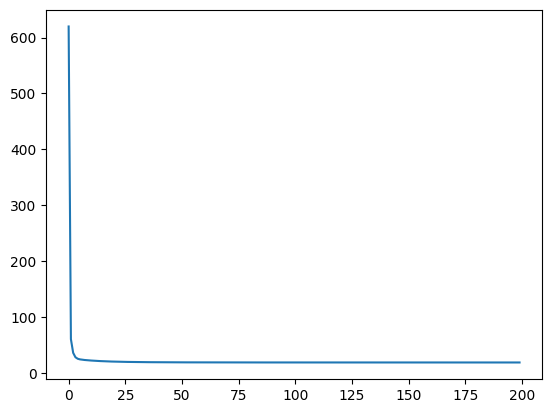

In [ ]:
plt.plot(his)


In [ ]:
X_test_new = np.hstack((np.ones((X_test.shape[0], 1)), X_test_scaled))
y_pred = predict(X_test_new, w)
evaluate(y_test, y_pred)


RMSE = 4.281949202876445
MAE = 3.532143015787555
r2-score = 0.6407743052259336


(np.float64(4.281949202876445),
 np.float64(3.532143015787555),
 np.float64(0.6407743052259336))

In [ ]:
# regularization
def train(X, y, lr=0.01, n_epoch=10, batch_size=64, alpha=None):
 w = np.zeros((5, 1))

 his = []
 for _ in range(n_epoch):
    y_pred = predict(X_new, w)
    his.append(loss(y_train, y_pred))
    for X_batch, y_batch in batch_generator(X_new, y_train, batch_size):
     dw = grad(X_batch, y_batch, w)
     if alpha is None:
        w -= lr * dw
     else:
        w -= lr * (dw + alpha * w)
 return w, his

In [ ]:
w, his = train(X_new, y_train, alpha=0.1, n_epoch=100)
y_pred = predict(X_test_new, w)
evaluate(y_test, y_pred)

RMSE = 4.264737176151491
MAE = 3.4923744592305286
r2-score = 0.6436564391089714


(np.float64(4.264737176151491),
 np.float64(3.4923744592305286),
 np.float64(0.6436564391089714))

 Xây dựng hàm đánh giá mô hình qua: mae, rmse, r2-score

In [ ]:
def evaluate(y_true, y_pred):
 rmse = np.sqrt(np.mean((y_true - y_pred)**2))
 mae = np.mean(np.abs(y_true - y_pred))

 sst = np.sum((y_true - y_true.mean())**2)
 ssr = np.sum((y_pred - y_true)**2)
 r2 = 1.0 - ssr/sst
 return rmse, mae, r2

Vẽ đồ thị sự phụ thuộc của r2-core vào alpha cho tập train và tập test. Lựa chọn giá trị alpha tốt nhất

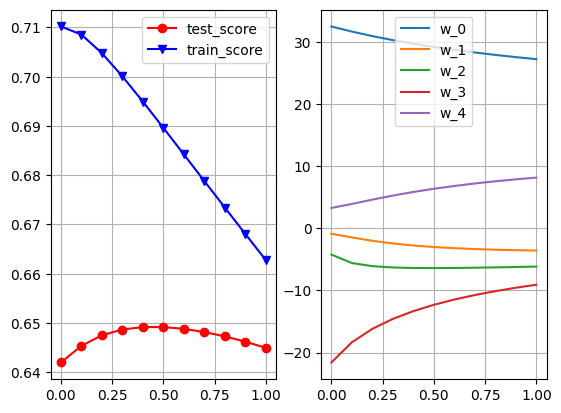

In [ ]:

alpha = np.linspace(0, 1, 11)
evaluations_train = []
evaluations_test = []
weights = []
for al in alpha:
 w, hist = train(X_new, y_train, alpha=al, n_epoch=1000)
 y_pred = predict(X_test_new, w)
 rmse_test, mae_test, r2_test = evaluate(y_test, y_pred)

 y_pred_train = predict(X_new, w)
 rmse_train, mae_train, r2_train = evaluate(y_train, y_pred_train)

 evaluations_test.append(r2_test)
 evaluations_train.append(r2_train)
 weights.append(w)
plt.subplot(121)
plt.plot(alpha, evaluations_test, '-o', c='r', label='test_score')
plt.plot(alpha, evaluations_train, '-v', c='b', label='train_score')
plt.grid()
plt.legend()
plt.subplot(122)
weights = np.array(weights)
for i in range(len(w)):
 plt.plot(alpha, weights[:, i], label=f"w_{i}")
plt.grid()
plt.legend()


In [ ]:
# Giải pháp phân tích sử dụng bộ giải tuyến tính
A = np.dot(X_new.T, X_new)
B = np.dot(X_new.T, y_train)
w_a = np.linalg.solve(A, B)

In [ ]:
y_pred = predict(X_test_new, w_a)
evaluate(y_test, y_pred)


(np.float64(4.248161736838507),
 np.float64(3.497501591985369),
 np.float64(0.6464210046831285))

In [ ]:
# Giải pháp phân tích sử dụng đảo ngược ma trận
A = np.dot(X_new.T, X_new)
inv_A = np.linalg.inv(A)
B = np.dot(X_new.T, y_train)
w_inv = np.dot(inv_A, B)
w_inv


array([[ 32.38953252],
       [ -0.49797242],
       [ -5.01913613],
       [-21.16169113],
       [  2.96630746]])

# Build model using Scikit-Learn


In [ ]:
# import lib
from sklearn.linear_model import LinearRegression
# create model
model = LinearRegression()
# Fit model to data
model.fit(X_train, y_train)
# Make prediction and evaluation
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)


(np.float64(4.248161736838553),
 np.float64(3.497501591985447),
 np.float64(0.6464210046831207))

In [ ]:
# using metrics in Scit-learn model_selection
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.6464210046831207

In [ ]:
# Build Ridge (L2) Regression bằng thư viện sklearn
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)
print(f'Test score: {model.score(X_test_scaled, y_test)}')
# Khảo sát sự phụ thuộc của các hệ số vào alpha
# -0.49797242, -5.01913613, -21.16169113, 2.96630746
model.coef_


Test score: 0.6481556219220217


array([ -2.47343654,  -6.68363517, -16.22334596,   2.10881307])

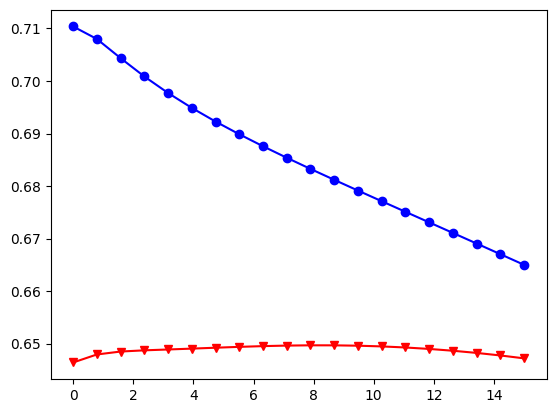

In [ ]:
# Khảo sát sự phụ thuộc của score vào hệ số alpha
train_score = []
test_score = []
weights = []
alpha = np.linspace(0, 15, 20)
for al in alpha:
 model = Ridge(alpha=al)
 model.fit(X_new, y_train)
 train_score.append(model.score(X_new, y_train))
 test_score.append(model.score(X_test_new, y_test))
plt.plot(alpha, train_score, '-o', c='b')
plt.plot(alpha, test_score, '-v', c='r')


 Build Lasso model bằng thư viện sklearn
 Khảo sát sự phụ thuộc của score vào hệ số alpha
 Khảo sát sự phụ thuộc của trọng số vào alpha


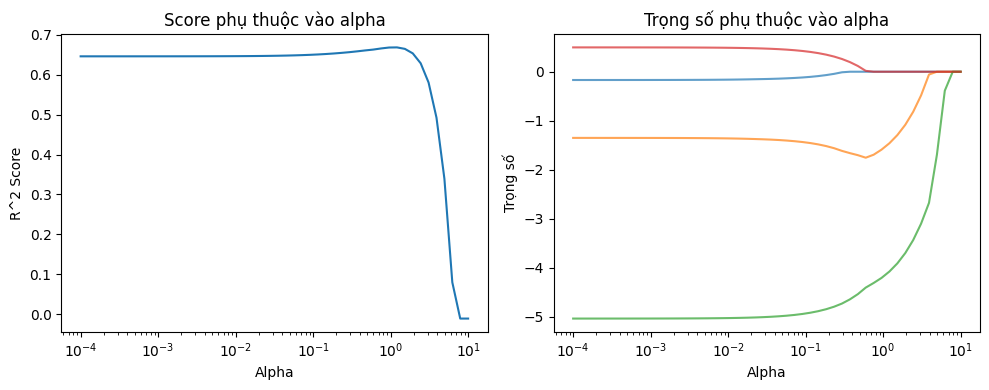

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

alphas = np.logspace(-4, 1, 50)
scores = []
weights = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    scores.append(lasso.score(X_test_scaled, y_test))
    weights.append(lasso.coef_)

weights = np.array(weights)

# Vẽ biểu đồ R^2 theo alpha
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(alphas, scores)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R^2 Score")
plt.title("Score phụ thuộc vào alpha")

# Vẽ biểu đồ trọng số theo alpha
plt.subplot(1, 2, 2)
for i in range(weights.shape[1]):
    plt.plot(alphas, weights[:, i], label=f'w{i}', alpha=0.7)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Trọng số")
plt.title("Trọng số phụ thuộc vào alpha")
plt.tight_layout()
plt.show()



Sử dụng GridSearchCV (Cross Validation) Để tìm các hyperparams
tốt nhất cho Ridge và Lasso

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-4, 1, 50)}

# Ridge
ridge = Ridge(fit_intercept=False)
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_ridge.fit(X_train, y_train)

# Lasso
lasso = Lasso(fit_intercept=False, max_iter=10000)
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_lasso.fit(X_train, y_train)

# Kết quả
print("Ridge best alpha:", grid_ridge.best_params_['alpha'])
print("Ridge best score:", grid_ridge.best_score_)
print("Lasso best alpha:", grid_lasso.best_params_['alpha'])
print("Lasso best score:", grid_lasso.best_score_)


Ridge best alpha: 1.5264179671752334
Ridge best score: 0.36090069671401476
Lasso best alpha: 0.0021209508879201904
Lasso best score: 0.3608752944781858
